In [3]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('realistic_e_commerce_sales_data.csv')

# Display the first few rows of the dataset to understand its structure
data.head()

,Customer ID,Gender,Region,Age,Product Name,Category,Unit Price,Quantity,Total Price,Shipping Fee,Shipping Status,Order Date
0,CUST0268,Male,North,NaN,Monitor,Electronics,300.0,5,1500,13.31,Returned,2023-12-08
1,CUST0046,Male,West,22.0,Headphones,Accessories,100.0,2,200,6.93,In Transit,2023-04-09
2,CUST0169,Female,South,54.0,Monitor,Electronics,300.0,1,300,11.31,Returned,2023-08-28
3,CUST0002,Male,North,23.0,Headphones,Accessories,100.0,5,500,12.22,Delivered,2023-01-18
4,CUST0173,Female,South,NaN,Laptop,Electronics,1500.0,3,4500,5.40,Delivered,2023-01-19


In [ ]:
#RFM analysis


import datetime as dt

# Reference date for Recency calculation
today_date = dt.datetime(2024, 11, 13)

# Calculate Recency, Frequency, Monetary
rfm = data.groupby('Customer ID').agg({
    'Order Date': lambda x: (today_date - x.max()).days,
    'Total Price': ['count', 'sum']
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# RFM segmentation scores
rfm['R'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Combine RFM scores
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis=1)

# Display RFM segmentation
print(rfm.head())


TypeError: unsupported operand type(s) for -: 'datetime.datetime' and 'str'

In [5]:
# Ensure 'Order Date' is in datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')

# Check if conversion was successful
print(data['Order Date'].head())

0   2023-12-08
1   2023-04-09
2   2023-08-28
3   2023-01-18
4   2023-01-19
Name: Order Date, dtype: datetime64[ns]


In [44]:
import pandas as pd
import datetime as dt

# Load dataset
data = pd.read_csv('realistic_e_commerce_sales_data.csv', parse_dates=['Order Date'])

# Set a reference date for Recency calculation
today_date = dt.datetime(2024, 11, 13)

# Calculate Recency, Frequency, and Monetary
rfm = data.groupby('Customer ID').agg({
    'Order Date': lambda x: (today_date - x.max()).days,
    'Total Price': ['count', 'sum']
})

# Rename columns
rfm.columns = ['Recency', 'Frequency', 'Monetary']

# Segment the data into RFM scores
rfm['R'] = pd.qcut(rfm['Recency'], 4, labels=[4, 3, 2, 1])
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
rfm['M'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4])

# Combine the scores to create a total RFM score
rfm['RFM_Score'] = rfm[['R', 'F', 'M']].sum(axis=1)

# Save to CSV
rfm.to_csv('rfm_results.csv')

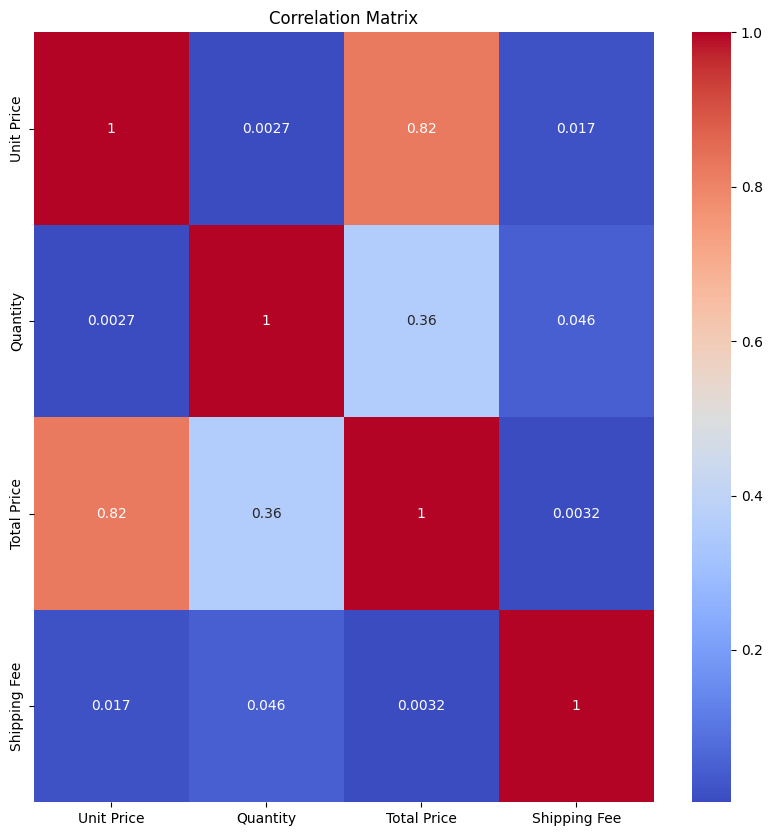

In [ ]:
#correlation analysis


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(data[['Unit Price', 'Quantity', 'Total Price', 'Shipping Fee']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\Users\Gomathi Saravanan\AppData\Local\Temp\ipykernel_37564\3853545174.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_sales.index, y=gender_sales.values, palette='pastel')


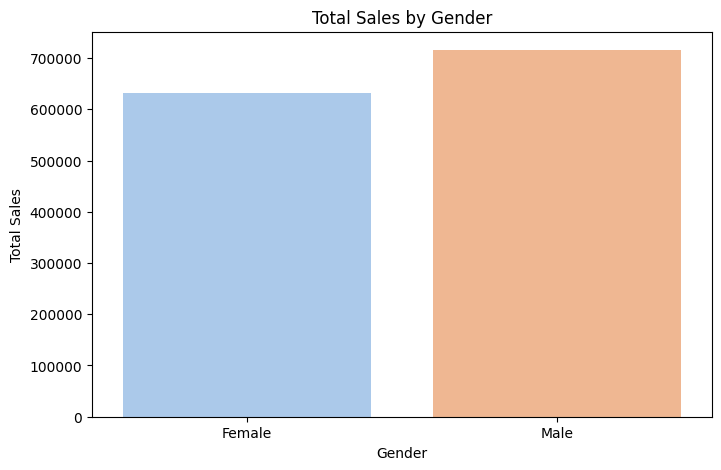

In [ ]:
#genderbased purchase analysis


gender_sales = data.groupby('Gender')['Total Price'].sum()

plt.figure(figsize=(8, 5))
sns.barplot(x=gender_sales.index, y=gender_sales.values, palette='pastel')
plt.title('Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.show()

C:\Users\Gomathi Saravanan\AppData\Local\Temp\ipykernel_37564\3245475266.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_sales = data.groupby('Age Group')['Total Price'].sum()
C:\Users\Gomathi Saravanan\AppData\Local\Temp\ipykernel_37564\3245475266.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_sales.index, y=age_group_sales.values, palette='viridis')


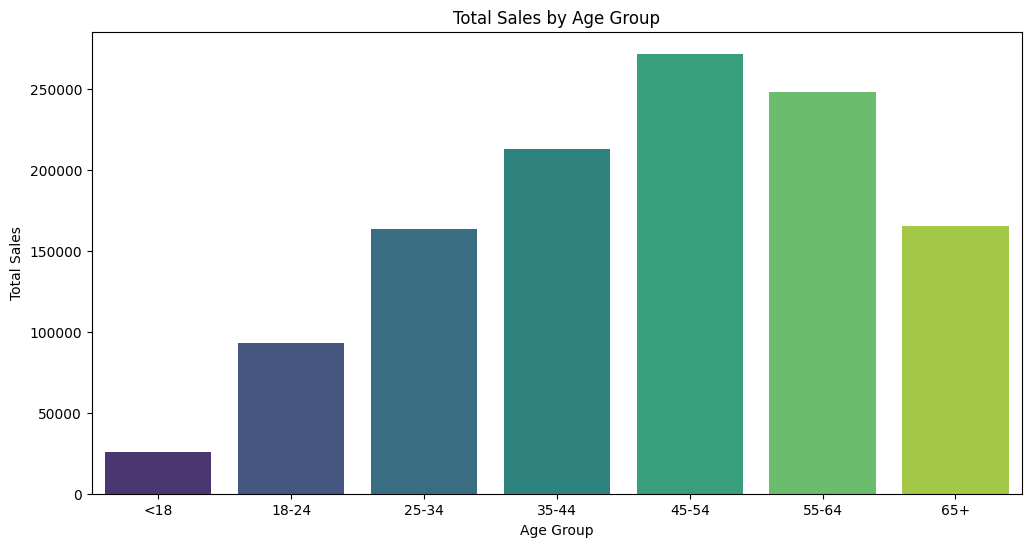

In [10]:
# age-group analysis


# Define age bins and labels
bins = [0, 18, 25, 35, 45, 55, 65, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']

# Create an 'Age Group' column
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels)

# Calculate total sales by age group
age_group_sales = data.groupby('Age Group')['Total Price'].sum()

# Plot total sales by age group
plt.figure(figsize=(12, 6))
sns.barplot(x=age_group_sales.index, y=age_group_sales.values, palette='viridis')
plt.title('Total Sales by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Total Sales')
plt.show()

C:\Users\Gomathi Saravanan\AppData\Local\Temp\ipykernel_37564\1057595489.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=return_status_counts.index, y=return_status_counts.values, palette='Blues')


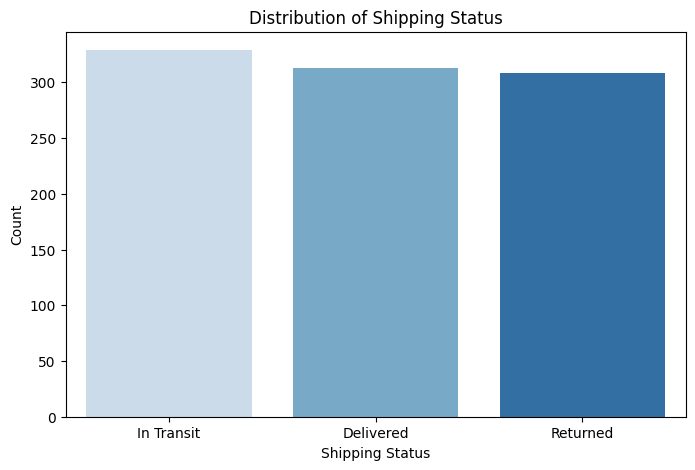

Percentage of returned orders: 30.80%


In [11]:
#return analysis


# Distribution of shipping statuses
return_status_counts = data['Shipping Status'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=return_status_counts.index, y=return_status_counts.values, palette='Blues')
plt.title('Distribution of Shipping Status')
plt.xlabel('Shipping Status')
plt.ylabel('Count')
plt.show()

# Calculate the percentage of returned orders
returned_orders = data[data['Shipping Status'] == 'Returned']
return_rate = len(returned_orders) / len(data) * 100
print(f"Percentage of returned orders: {return_rate:.2f}%")

C:\Users\Gomathi Saravanan\AppData\Local\Temp\ipykernel_37564\1073740715.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.index, y=top_products.values, palette='magma')


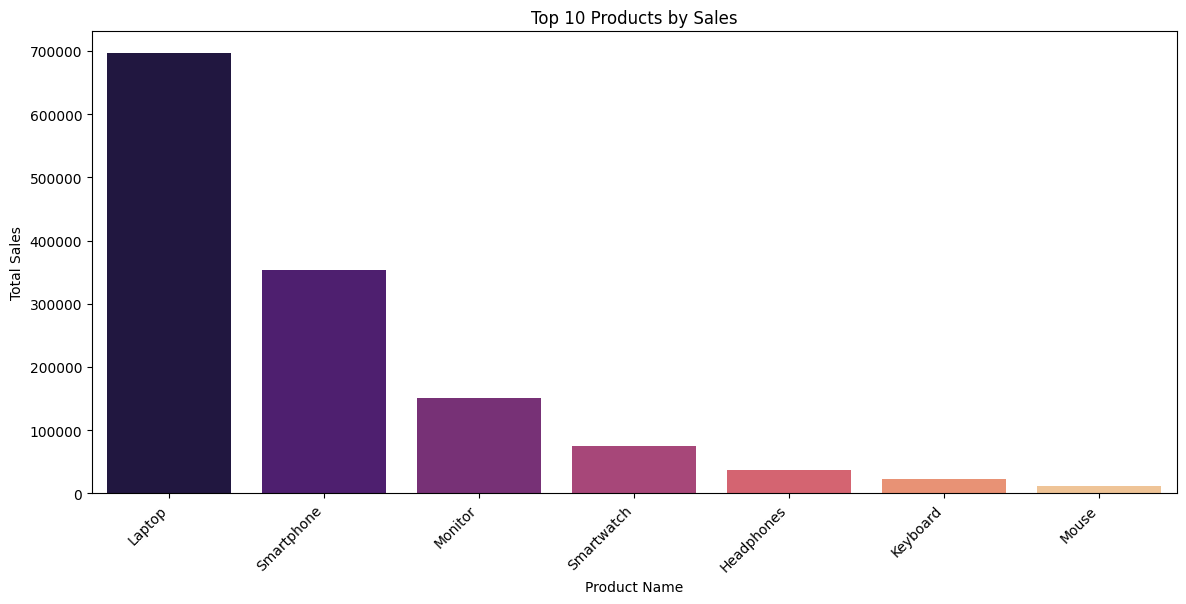

In [12]:
# top product analysis

# Calculate total sales by product
top_products = data.groupby('Product Name')['Total Price'].sum().sort_values(ascending=False).head(10)

# Plot top 10 products by sales
plt.figure(figsize=(14, 6))
sns.barplot(x=top_products.index, y=top_products.values, palette='magma')
plt.title('Top 10 Products by Sales')
plt.xlabel('Product Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

C:\Users\Gomathi Saravanan\AppData\Local\Temp\ipykernel_37564\3638092601.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales_summary.index, y=monthly_sales_summary.values, palette='coolwarm')


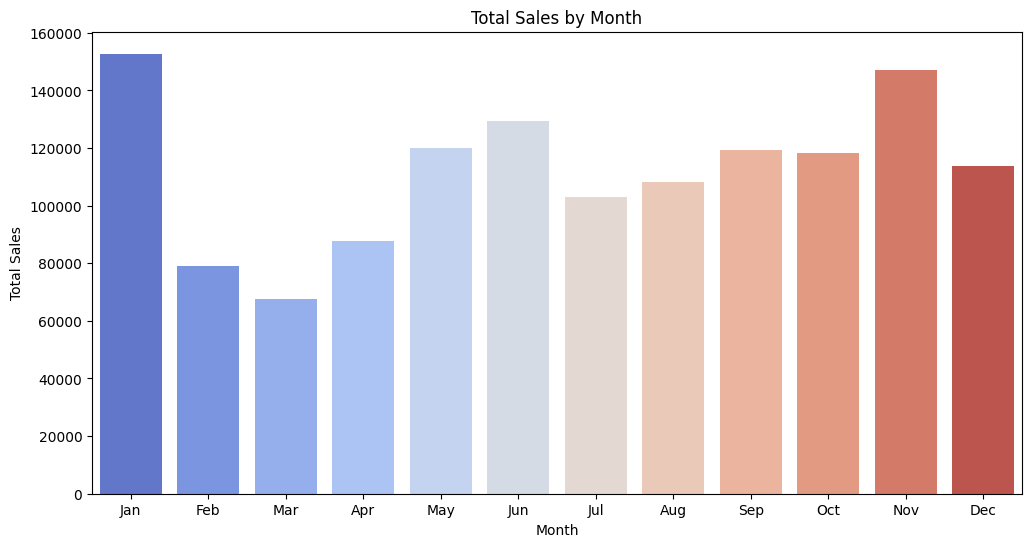

In [13]:
# seasonal sale analysis

# Extract month from [Order Date] to analyze seasonality
data['Month'] = data['Order Date'].dt.month

# Calculate total sales by month
monthly_sales_summary = data.groupby('Month')['Total Price'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_sales_summary.index, y=monthly_sales_summary.values, palette='coolwarm')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

C:\Users\Gomathi Saravanan\AppData\Local\Temp\ipykernel_37564\647927071.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette='tab10')


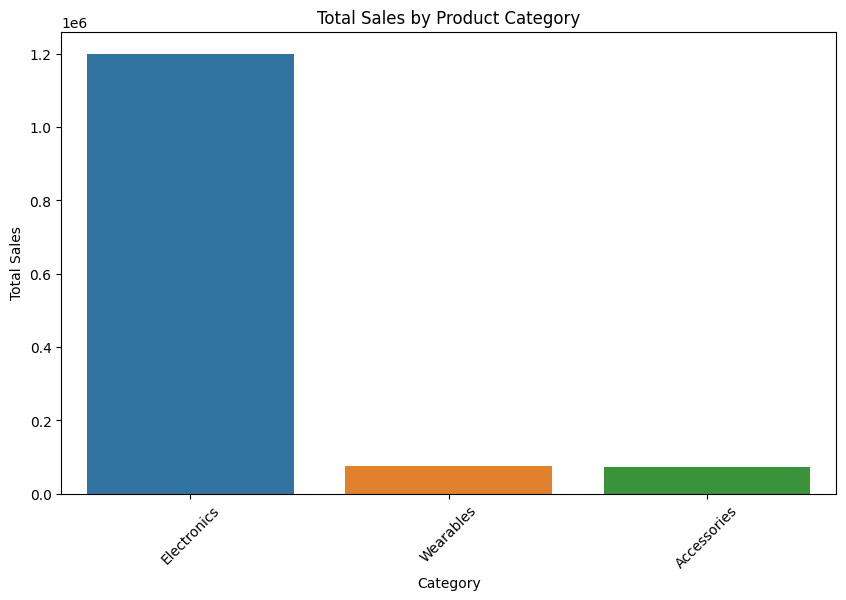

In [14]:
# product categry performance

# Total sales by category
category_sales = data.groupby('Category')['Total Price'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_sales.index, y=category_sales.values, palette='tab10')
plt.title('Total Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

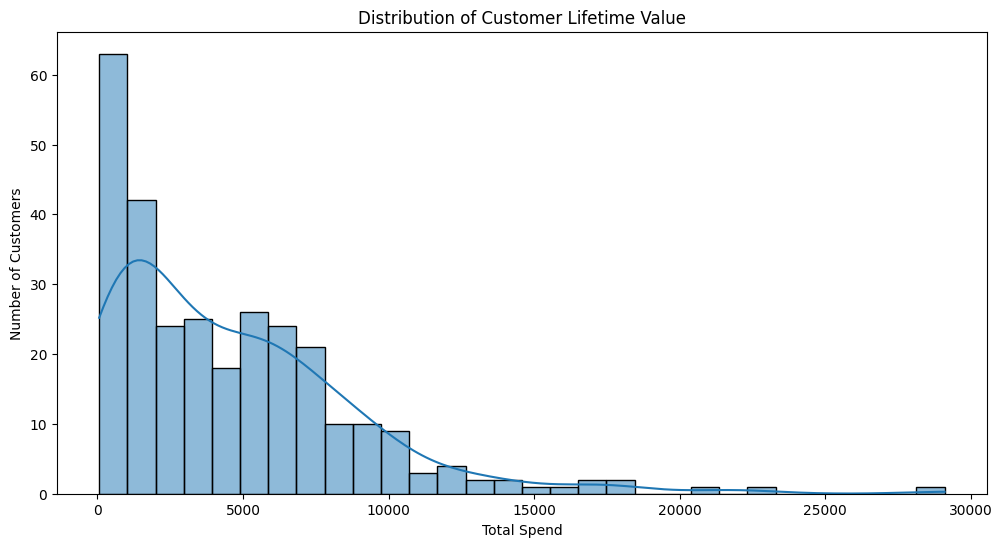

Top 5 Customers by Lifetime Value:
Customer ID
CUST0204    29100
CUST0095    22440
CUST0131    21180
CUST0139    18350
CUST0281    17850
Name: Total Price, dtype: int64


In [15]:
# clv estimation --> customer lifetime value

# Calculate total spend per customer
clv = data.groupby('Customer ID')['Total Price'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.histplot(clv, kde=True, bins=30)
plt.title('Distribution of Customer Lifetime Value')
plt.xlabel('Total Spend')
plt.ylabel('Number of Customers')
plt.show()

# Display top 5 customers by CLV
print("Top 5 Customers by Lifetime Value:")
print(clv.head())

In [16]:
# repeated customers 

# Count the number of purchases per customer
repeat_customers = data['Customer ID'].value_counts()

# Define repeat customers as those who have made more than one purchase
repeat_customers_count = (repeat_customers > 1).sum()
repeat_customers_percentage = (repeat_customers_count / len(repeat_customers)) * 100

print(f"Number of repeat customers: {repeat_customers_count}")
print(f"Percentage of repeat customers: {repeat_customers_percentage:.2f}%")

# Sales contribution from repeat customers
repeat_customer_sales = data[data['Customer ID'].isin(repeat_customers[repeat_customers > 1].index)]['Total Price'].sum()
total_sales = data['Total Price'].sum()
repeat_sales_percentage = (repeat_customer_sales / total_sales) * 100

print(f"Sales contribution from repeat customers: {repeat_sales_percentage:.2f}%")

Number of repeat customers: 251
Percentage of repeat customers: 85.96%
Sales contribution from repeat customers: 96.56%


In [18]:
# aov analysis --> average order value

# Calculate Average Order Value
total_revenue = data['Total Price'].sum()
total_orders = data['Order Date'].count()
average_order_value = total_revenue / total_orders

print(f"Average Order Value: ${average_order_value:.2f}")

Average Order Value: $1346.60


C:\Users\Gomathi Saravanan\AppData\Local\Temp\ipykernel_37564\1387897613.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=return_rate_by_category.index, y=return_rate_by_category.values, palette='Reds')


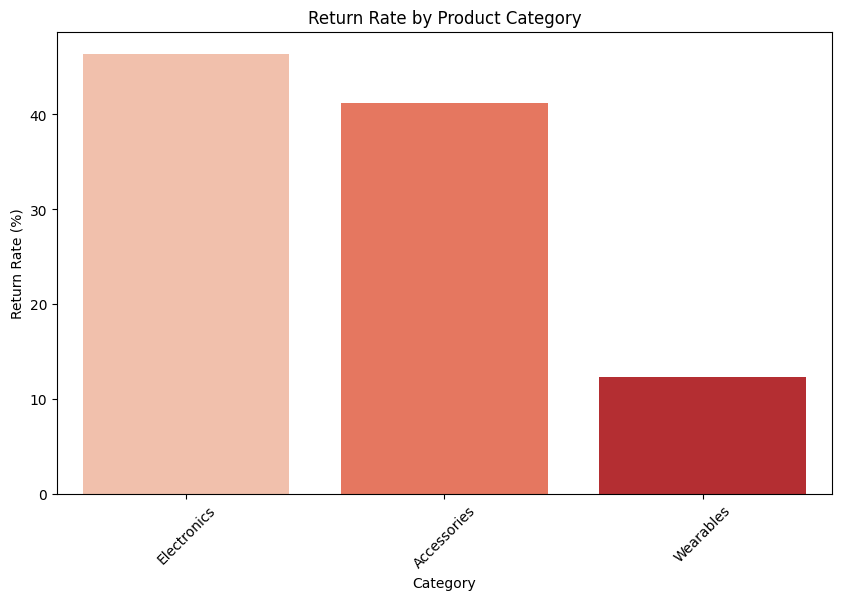

In [19]:
# product return by category

# Calculate returns by category
returned_data = data[data['Shipping Status'] == 'Returned']
return_rate_by_category = returned_data['Category'].value_counts(normalize=True) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=return_rate_by_category.index, y=return_rate_by_category.values, palette='Reds')
plt.title('Return Rate by Product Category')
plt.xlabel('Category')
plt.ylabel('Return Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [21]:
# churn prediction analysis 
# --> objective: to identify customers at risk of churning (not returning) based on their purchasing behavior...

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import datetime as dt

# Add 'Last Purchase' column to the dataset
data['Last Purchase'] = data.groupby('Customer ID')['Order Date'].transform('max')

# Define a churn threshold (e.g., customers who haven't purchased in the last 6 months)
churn_threshold = dt.datetime(2024, 5, 13)  # Adjust this date as needed

# Label customers as churned (1) or not churned (0)
data['Churn'] = data['Last Purchase'].apply(lambda x: 1 if x < churn_threshold else 0)

# Prepare features (RFM data) and target (Churn)
features = rfm[['Recency', 'Frequency', 'Monetary']]
target = data.drop_duplicates('Customer ID')['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train a RandomForest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        88

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



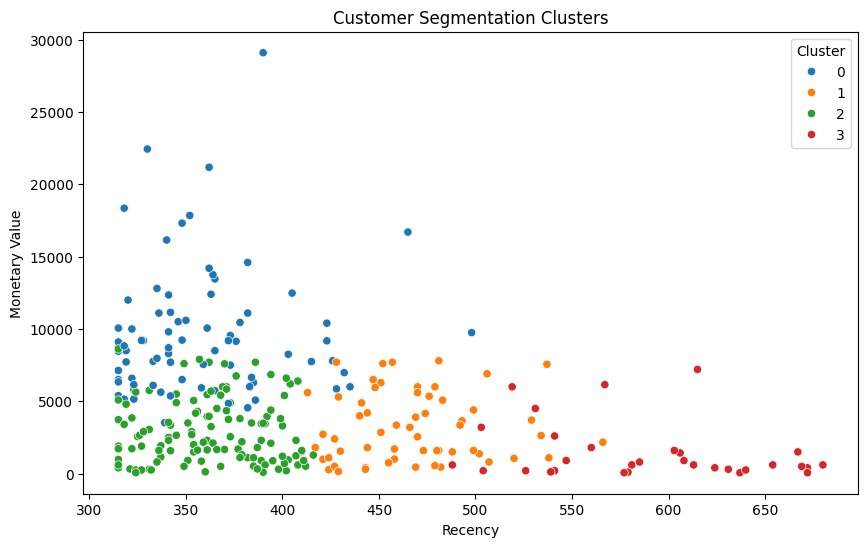

In [24]:
#customer segmentation analysis

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Normalize RFM data for clustering
rfm_normalized = (rfm[['Recency', 'Frequency', 'Monetary']] - rfm[['Recency', 'Frequency', 'Monetary']].mean()) / rfm[['Recency', 'Frequency', 'Monetary']].std()

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_normalized)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='tab10')
plt.title('Customer Segmentation Clusters')
plt.xlabel('Recency')
plt.ylabel('Monetary Value')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# basket analysis with association rules 
## objective --> Identify products that are frequently bought together to inform cross-selling and product bundling strategies

from mlxtend.frequent_patterns import apriori, association_rules

# Create a basket matrix for market basket analysis
basket = data.pivot_table(index='Customer ID', columns='Product Name', values='Quantity', aggfunc='sum').fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Generate association rules without any additional parameters
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Display the top 5 rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())

C:\Users\Gomathi Saravanan\AppData\Local\Temp\ipykernel_37564\1602007488.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
c:\Users\Gomathi Saravanan\Desktop\profile\Ecommerce\env\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


TypeError: association_rules() missing 1 required positional argument: 'num_itemsets'

In [31]:
from mlxtend.frequent_patterns import apriori
import pandas as pd

# Create a basket matrix for market basket analysis
basket = data.pivot_table(index='Customer ID', columns='Product Name', values='Quantity', aggfunc='sum').fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# Apply Apriori algorithm to find frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Create a function to calculate the rules manually
def generate_association_rules(frequent_itemsets, min_confidence=0.5, min_lift=1.0):
    rules = []
    for itemset in frequent_itemsets['itemsets']:
        for item in itemset:
            antecedent = frozenset([item])
            consequent = itemset - antecedent
            if consequent:
                support = frequent_itemsets.loc[frequent_itemsets['itemsets'] == itemset, 'support'].values[0]
                antecedent_support = frequent_itemsets.loc[frequent_itemsets['itemsets'] == antecedent, 'support'].values[0]
                confidence = support / antecedent_support
                lift = confidence / (frequent_itemsets.loc[frequent_itemsets['itemsets'] == consequent, 'support'].values[0] if frequent_itemsets['itemsets'].isin([consequent]).any() else 0.001)

                if confidence >= min_confidence and lift >= min_lift:
                    rules.append({
                        'antecedent': antecedent,
                        'consequent': consequent,
                        'support': support,
                        'confidence': confidence,
                        'lift': lift
                    })

    return pd.DataFrame(rules)

# Generate rules manually
rules = generate_association_rules(frequent_itemsets)
print(rules.head())

C:\Users\Gomathi Saravanan\AppData\Local\Temp\ipykernel_37564\2354638261.py:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
c:\Users\Gomathi Saravanan\Desktop\profile\Ecommerce\env\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


     antecedent consequent   support  confidence      lift
0  (Smartphone)  (Monitor)  0.191781         0.5  1.081481


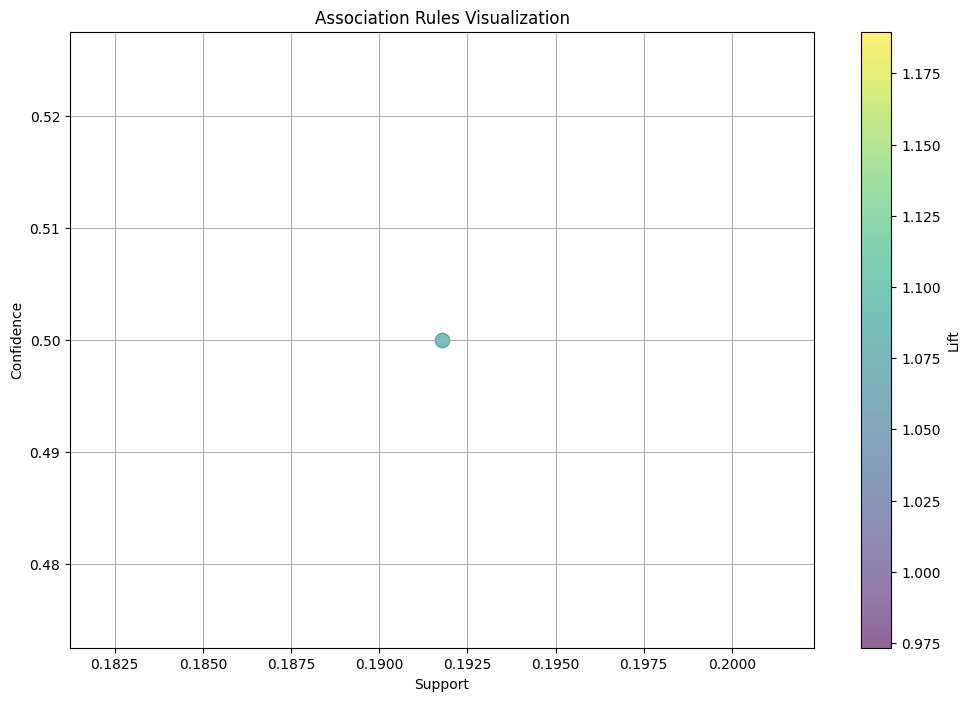

In [32]:
import matplotlib.pyplot as plt

# Plot association rules with support on the x-axis, confidence on the y-axis, and lift represented by bubble size
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    rules['support'],
    rules['confidence'],
    s=rules['lift'] * 100,  # Bubble size based on lift
    alpha=0.6,
    c=rules['lift'],  # Color based on lift
    cmap='viridis'
)
plt.colorbar(scatter, label='Lift')
plt.title('Association Rules Visualization')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.grid(True)
plt.show()

c:\Users\Gomathi Saravanan\Desktop\profile\Ecommerce\env\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


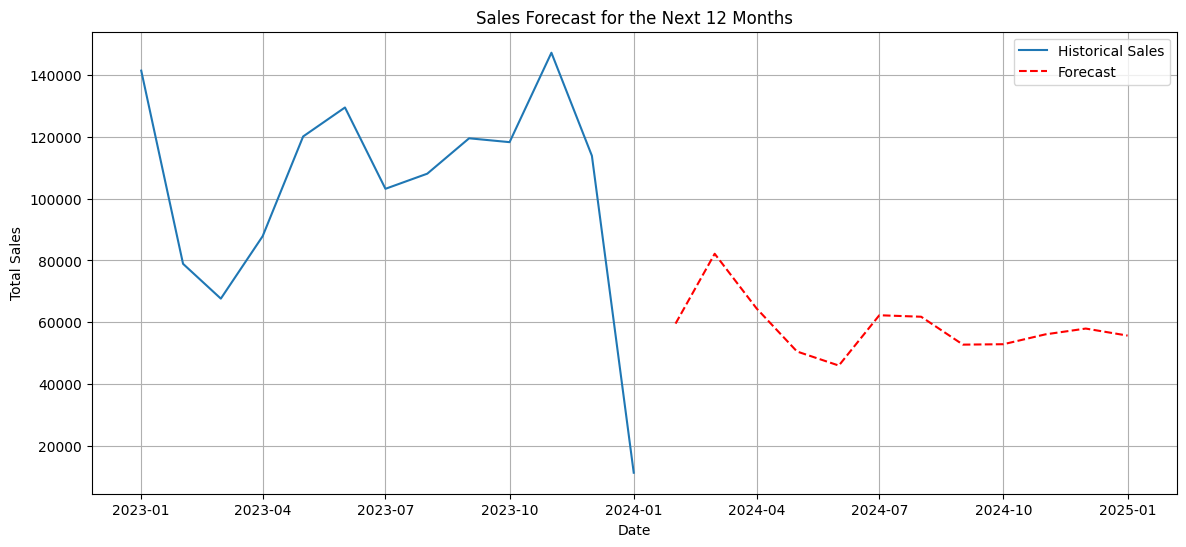

In [34]:
# time series forecasting for sales 
## objective --> can help businesses prepare for upcoming demand fluctuations

from statsmodels.tsa.arima.model import ARIMA # ARIMA time series forecasting model
import matplotlib.pyplot as plt

# Prepare time series data
sales_time_series = data.groupby(data['Order Date'].dt.to_period('M'))['Total Price'].sum()
sales_time_series.index = sales_time_series.index.to_timestamp()

# Fit ARIMA model (order (p, d, q) can be tuned based on ACF/PACF plots)
model = ARIMA(sales_time_series, order=(5, 1, 0))  # You can adjust (p, d, q) parameters as needed
model_fit = model.fit()

# Forecast the next 12 months
forecast = model_fit.forecast(steps=12)

# Plot historical sales and forecast
plt.figure(figsize=(14, 6))
plt.plot(sales_time_series, label='Historical Sales')
plt.plot(forecast, label='Forecast', linestyle='--', color='red')
plt.title('Sales Forecast for the Next 12 Months')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.grid(True)
plt.show()

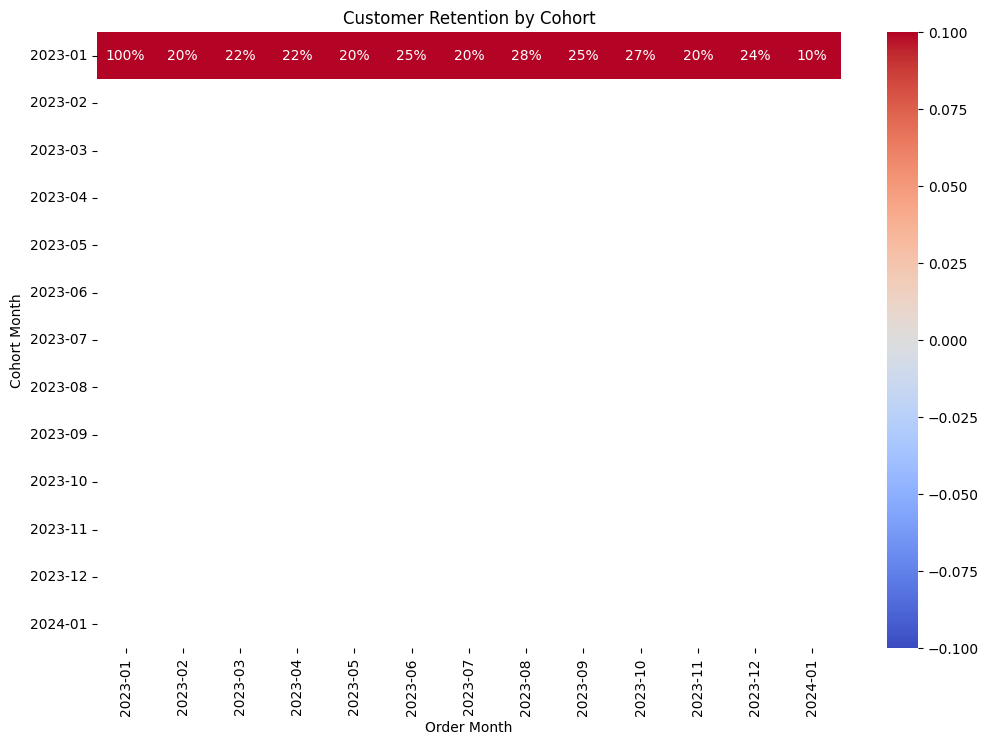

In [35]:
# customer retention analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Create a 'First Purchase Month' column
data['First Purchase Month'] = data.groupby('Customer ID')['Order Date'].transform('min').dt.to_period('M')

# Create an 'Order Month' column
data['Order Month'] = data['Order Date'].dt.to_period('M')

# Create a cohort table
cohort_data = data.groupby(['First Purchase Month', 'Order Month'])['Customer ID'].nunique().unstack().fillna(0)

# Calculate retention rates
cohort_size = cohort_data.iloc[:, 0]  # Get the size of the cohort (first month)
retention_matrix = cohort_data.divide(cohort_size, axis=0)

# Visualize the retention matrix
plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt=".0%", cmap='coolwarm')
plt.title('Customer Retention by Cohort')
plt.xlabel('Order Month')
plt.ylabel('Cohort Month')
plt.show()

C:\Users\Gomathi Saravanan\AppData\Local\Temp\ipykernel_37564\1557865050.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cohort_age_group = data.groupby(['Age Group', 'Order Month'])['Customer ID'].nunique().unstack().fillna(0)


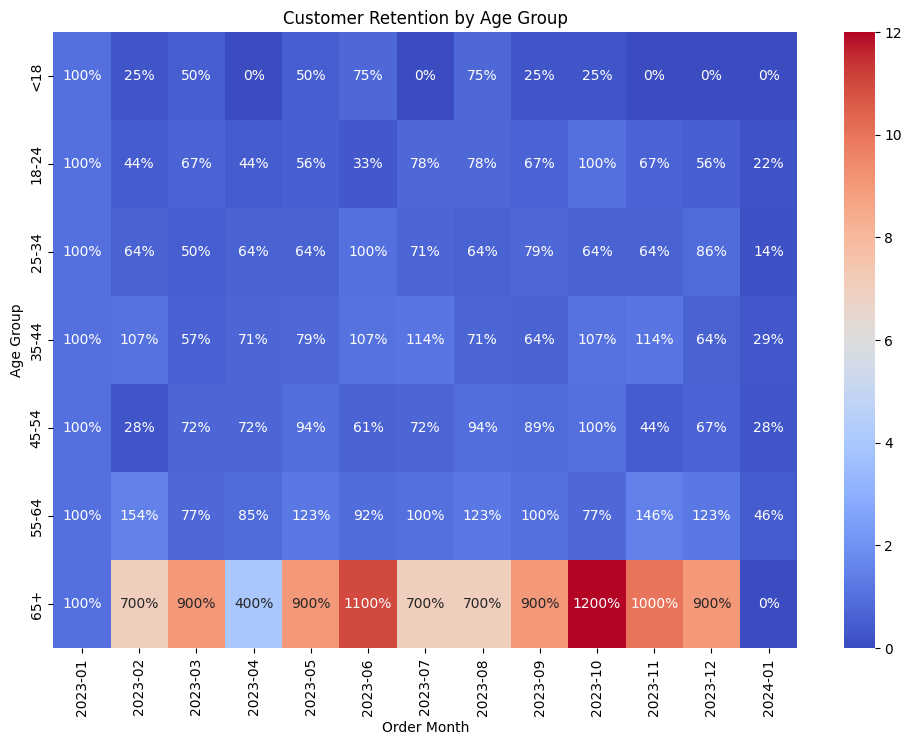

In [ ]:
# customer segementation by demographics and behavior

# Create [Age Group] column if it doesn't already exist
data['Age Group'] = pd.cut(data['Age'], bins=[0, 18, 25, 35, 45, 55, 65, 100], labels=['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+'])

# Group by [Age Group] and [Order Month] to calculate retention by age group
cohort_age_group = data.groupby(['Age Group', 'Order Month'])['Customer ID'].nunique().unstack().fillna(0)
cohort_size_age = cohort_age_group.iloc[:, 0]  # Get the size of the first month cohort for each age group
retention_age_matrix = cohort_age_group.divide(cohort_size_age, axis=0)

# Plot retention by age group
plt.figure(figsize=(12, 8))
sns.heatmap(retention_age_matrix, annot=True, fmt=".0%", cmap='coolwarm')
plt.title('Customer Retention by Age Group')
plt.xlabel('Order Month')
plt.ylabel('Age Group')
plt.show()

c:\Users\Gomathi Saravanan\Desktop\profile\Ecommerce\env\Lib\site-packages\autograd\numpy\numpy_wrapper.py:7: DeprecationWarning: numpy.core.einsumfunc is deprecated and has been renamed to numpy._core.einsumfunc. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.einsumfunc._parse_einsum_input.
  from numpy.core.einsumfunc import _parse_einsum_input


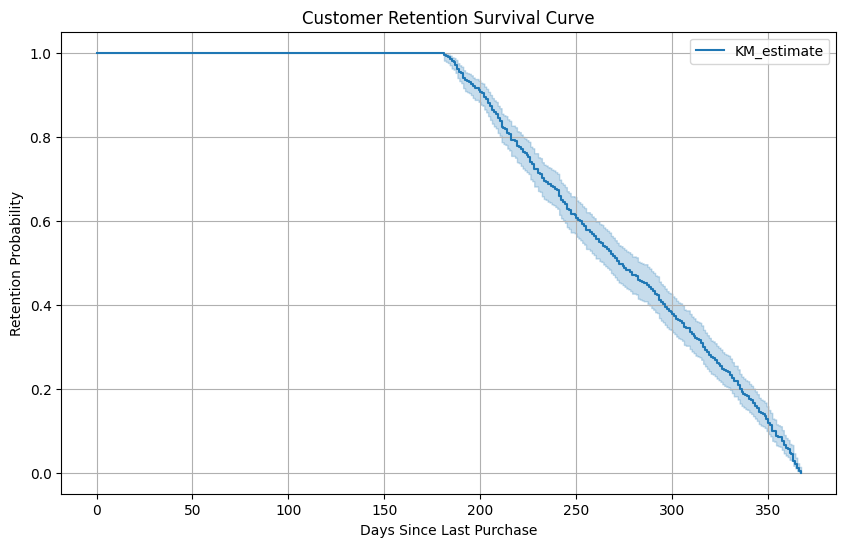

In [38]:
# survival analysis for customer retention

from lifelines import KaplanMeierFitter

# Calculate [Tenure] as the number of days since the last purchase until the end of the observation period
data['Tenure'] = (data['Order Date'].max() - data['Order Date']).dt.days

# Create a churn indicator (1 --> if churned, 0 --> otherwise)
data['Churn'] = data['Tenure'].apply(lambda x: 1 if x > 180 else 0)  # Churn defined as no purchase in the last 6 months

# Fit the Kaplan-Meier model
kmf = KaplanMeierFitter()
kmf.fit(data['Tenure'], event_observed=data['Churn'])

# Plot the survival curve
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Customer Retention Survival Curve')
plt.xlabel('Days Since Last Purchase')
plt.ylabel('Retention Probability')
plt.grid(True)
plt.show()

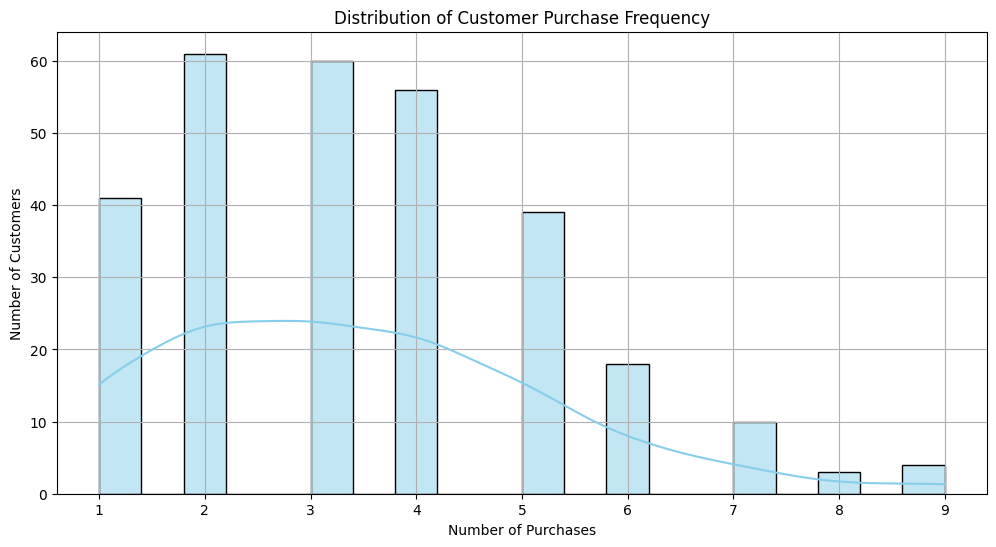

In [39]:
# purchase frequency

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of purchases per customer
purchase_frequency = data['Customer ID'].value_counts()

# Plot the distribution of purchase frequency
plt.figure(figsize=(12, 6))
sns.histplot(purchase_frequency, kde=True, bins=20, color='skyblue')
plt.title('Distribution of Customer Purchase Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

C:\Users\Gomathi Saravanan\AppData\Local\Temp\ipykernel_37564\516483593.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_retention.index[:10], y=product_retention.values[:10], palette='viridis')


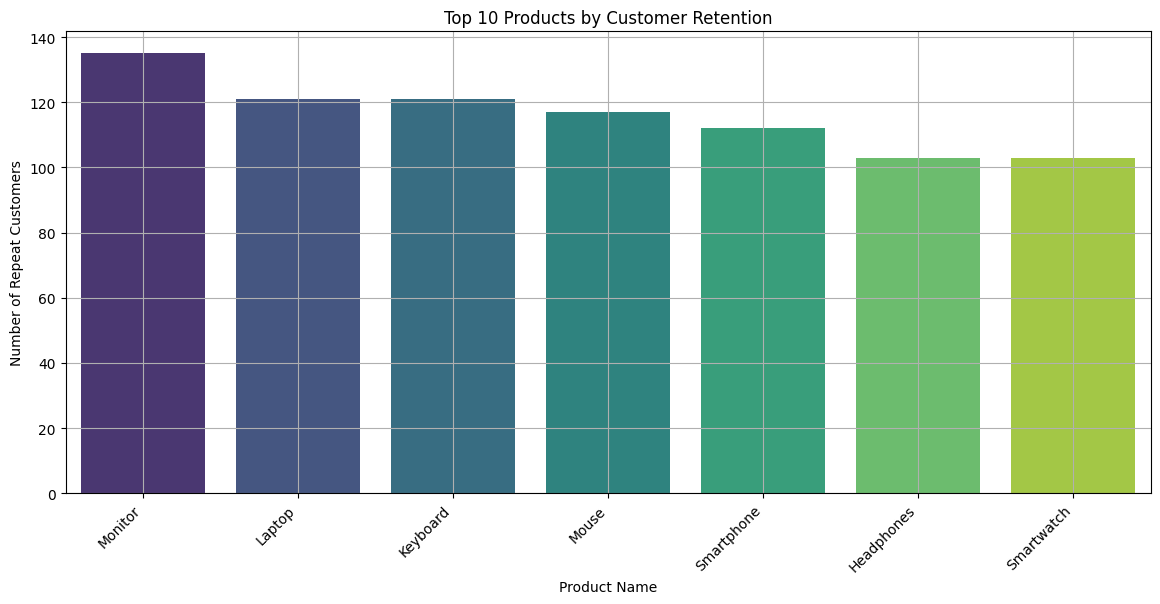

In [40]:
# product level retention analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of repeat customers for each product
product_retention = data.groupby('Product Name')['Customer ID'].nunique().sort_values(ascending=False)

# Plot the top 10 products by customer retention
plt.figure(figsize=(14, 6))
sns.barplot(x=product_retention.index[:10], y=product_retention.values[:10], palette='viridis')
plt.title('Top 10 Products by Customer Retention')
plt.xlabel('Product Name')
plt.ylabel('Number of Repeat Customers')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

C:\Users\Gomathi Saravanan\AppData\Local\Temp\ipykernel_37564\1456071382.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_return_rate.index[:10], y=product_return_rate.values[:10], palette='Reds')


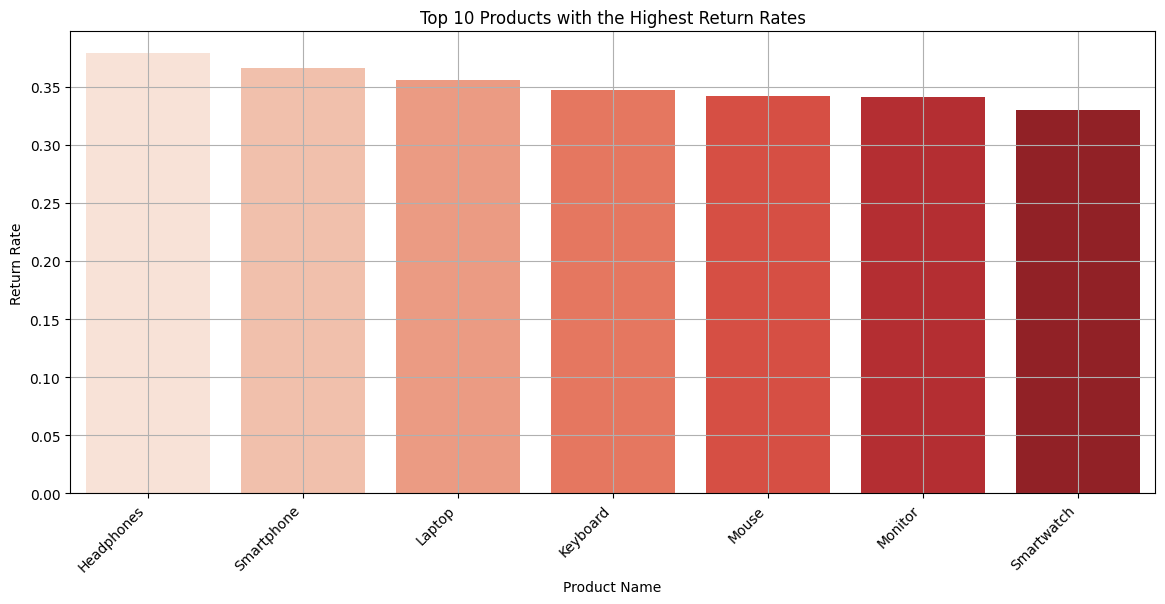

In [41]:
# products with high-return rates

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the return rate for each product
return_rate = data[data['Shipping Status'] == 'Returned'].groupby('Product Name')['Customer ID'].nunique()
total_sales = data.groupby('Product Name')['Customer ID'].nunique()
product_return_rate = (return_rate / total_sales).sort_values(ascending=False).fillna(0)

# Plot the top 10 products with the highest return rates
plt.figure(figsize=(14, 6))
sns.barplot(x=product_return_rate.index[:10], y=product_return_rate.values[:10], palette='Reds')
plt.title('Top 10 Products with the Highest Return Rates')
plt.xlabel('Product Name')
plt.ylabel('Return Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

C:\Users\Gomathi Saravanan\AppData\Local\Temp\ipykernel_37564\1309556518.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_retention.index, y=category_retention.values, palette='Blues')


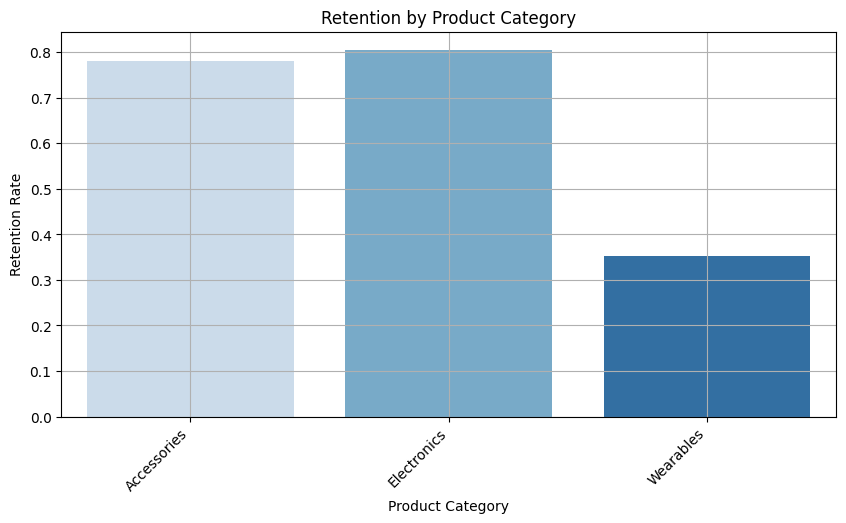

In [42]:
# correlation analysis between retention and product categories

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the retention rate by product category
category_retention = data.groupby('Category')['Customer ID'].nunique() / data['Customer ID'].nunique()

# Plot the retention by product category
plt.figure(figsize=(10, 5))
sns.barplot(x=category_retention.index, y=category_retention.values, palette='Blues')
plt.title('Retention by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Retention Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

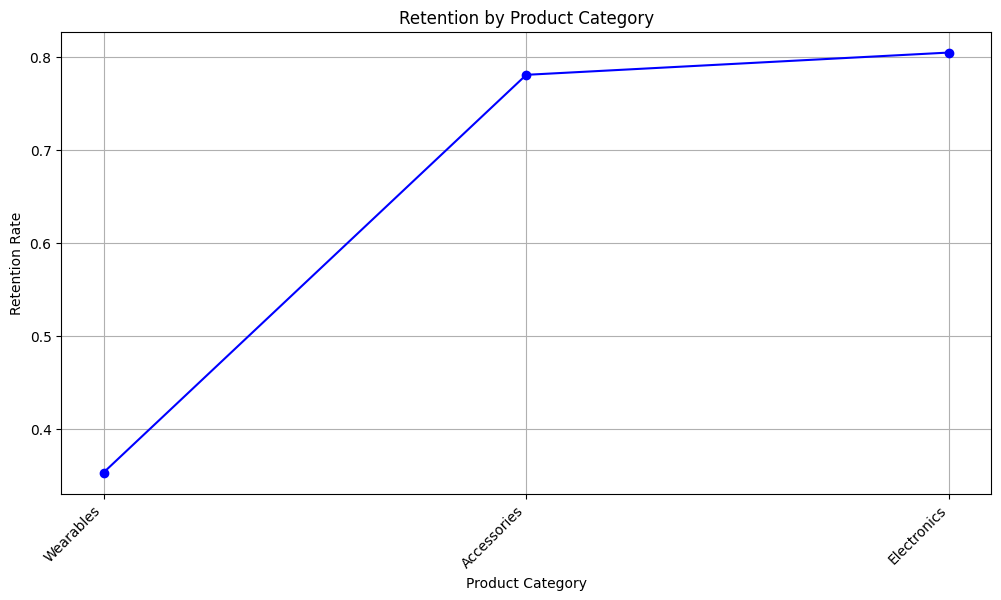

In [43]:
# retnetion rates by product category

import matplotlib.pyplot as plt

# Calculate the retention rate by product category
category_retention = data.groupby('Category')['Customer ID'].nunique() / data['Customer ID'].nunique()

# Sort categories by retention rate for better visualization
category_retention = category_retention.sort_values()

# Plot retention by product category using a line plot
plt.figure(figsize=(12, 6))
plt.plot(category_retention.index, category_retention.values, marker='o', linestyle='-', color='blue')
plt.title('Retention by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Retention Rate')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()